In [54]:
# lib
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ast
import matplotlib.pyplot as plt

In [55]:
# Function to convert stringified lists/dictionaries to lists/dictionaries
def parse_stringified_json(data_str):
    try:
        return ast.literal_eval(data_str)
    except:
        return []

# Load and clean the movie metadata
def clean_data(metadata_path):
    # Load data
    movies_metadata = pd.read_csv(metadata_path)
    print(movies_metadata.shape)

    # Select relevant columns
    relevant_columns = ['id', 'title', 'genres', 'overview']
    movies_metadata = movies_metadata[relevant_columns]

    # Handle missing values
    movies_metadata.dropna(inplace=True)

    # Remove duplicates
    movies_metadata.drop_duplicates(subset='id', keep='first', inplace=True)

    # Convert 'id' to int
    movies_metadata['id'] = pd.to_numeric(movies_metadata['id'], errors='coerce')
    movies_metadata.dropna(subset=['id'], inplace=True)
    movies_metadata['id'] = movies_metadata['id'].astype(int)

    # Parse genres from stringified JSON to list
    movies_metadata['genres'] = movies_metadata['genres'].apply(parse_stringified_json)
    movies_metadata['genres'] = movies_metadata['genres'].apply(lambda x: ' '.join([i['name'] for i in x]))

    # Combine genres and overview for feature extraction
    movies_metadata['combined_features'] = movies_metadata['genres'] + " " + movies_metadata['overview']

    return movies_metadata

metadata_path = 'data/Movie/movies_metadata.csv'

movies_metadata = clean_data(metadata_path)
movies_metadata.head(5)

C:\Users\yi_ch\AppData\Local\Temp\ipykernel_35436\48314276.py:11: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv(metadata_path)


(45466, 24)


,id,title,genres,overview,combined_features
0,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...","Animation Comedy Family Led by Woody, Andy's t..."
1,8844,Jumanji,Adventure Fantasy Family,When siblings Judy and Peter discover an encha...,Adventure Fantasy Family When siblings Judy an...
2,15602,Grumpier Old Men,Romance Comedy,A family wedding reignites the ancient feud be...,Romance Comedy A family wedding reignites the ...
3,31357,Waiting to Exhale,Comedy Drama Romance,"Cheated on, mistreated and stepped on, the wom...","Comedy Drama Romance Cheated on, mistreated an..."
4,11862,Father of the Bride Part II,Comedy,Just when George Banks has recovered from his ...,Comedy Just when George Banks has recovered fr...


#### TF-IDF with 2000 features

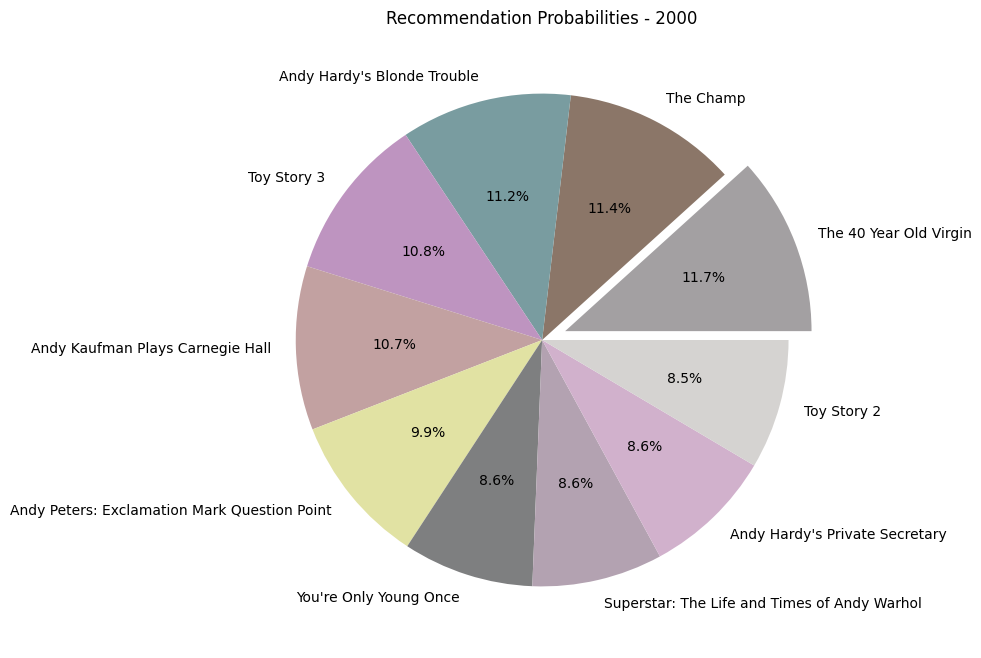

In [56]:
# 2000 features
# Feature extraction and similarity calculation
max_features = 2000  # Limiting to 2000 features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=max_features)
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_metadata['combined_features'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Recommendation function
def recommend_movies_with_scores(movie_id, cosine_sim, movies_metadata, top_n=10):
    if movie_id not in movies_metadata['id'].values:
        return "Movie ID not found."
    idx = movies_metadata.index[movies_metadata['id'] == movie_id].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]
    movie_scores = [i[1] for i in sim_scores]
    return movies_metadata['title'].iloc[movie_indices].tolist(), movie_scores

# Running the recommendation system with scores
movie_id = 862  # Toy Story
recommended_movies, scores = recommend_movies_with_scores(movie_id, cosine_sim, movies_metadata)

# Creating a pie chart for the recommendation probabilities
colors = ['#a3a0a2', '#8b7668', '#799ca0', '#be94c0', '#c2a1a1', '#e1e2a3', '#7e7f80', '#b3a2b1', '#d1b1cc', '#d5d3d1']
max_score = scores.index(max(scores))
explode = [0.1 if i == max_score else 0 for i in range(len(scores))]
plt.figure(figsize=(8, 8))
plt.pie(scores, labels=recommended_movies, autopct='%1.1f%%', colors = colors, explode = explode)
plt.title('Recommendation Probabilities - 2000')
plt.show()

In [57]:
input_movie_genre = movies_metadata[movies_metadata['id']==movie_id]['genres']
input_movie_genre

0    Animation Comedy Family
Name: genres, dtype: object

In [58]:
for x in recommended_movies:
    genres = movies_metadata[movies_metadata['title'] == x]['genres'].values
    print(list(genres))

['Comedy Romance']
['Drama Family', 'Drama']
['Comedy Family Romance']
['Animation Family Comedy']
['']
['Comedy']
['Comedy Romance']
['Documentary']
['Comedy Romance']
['Animation Comedy Family']


#### TF-IDF with 5000 features

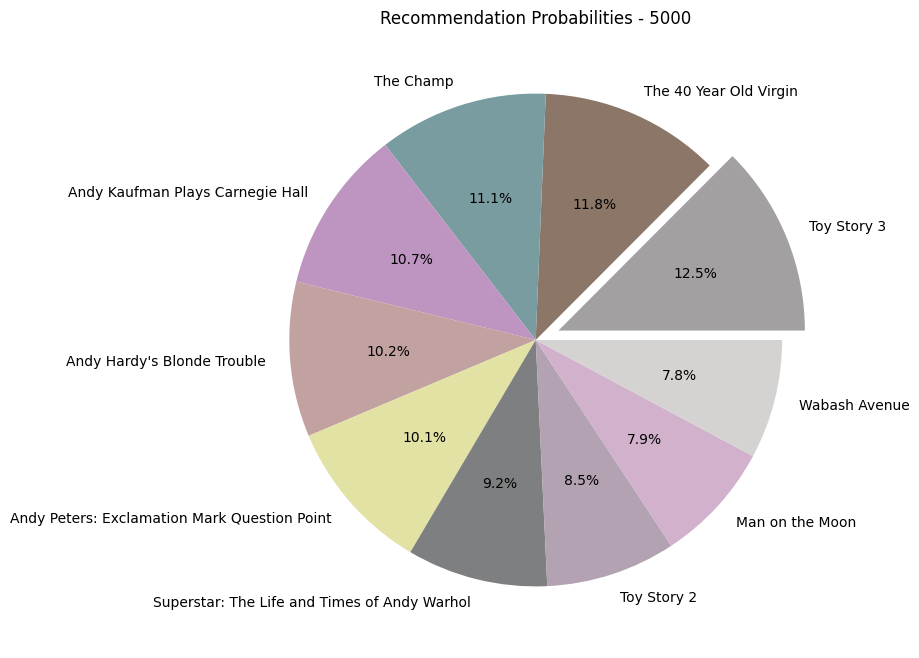

In [59]:
# 5000 features
# Feature extraction and similarity calculation
max_features = 5000  # Limiting to 5000 features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=max_features)
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_metadata['combined_features'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Recommendation function
def recommend_movies_with_scores(movie_id, cosine_sim, movies_metadata, top_n=10):
    if movie_id not in movies_metadata['id'].values:
        return "Movie ID not found."
    idx = movies_metadata.index[movies_metadata['id'] == movie_id].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]
    movie_scores = [i[1] for i in sim_scores]
    return movies_metadata['title'].iloc[movie_indices].tolist(), movie_scores

# Running the recommendation system with scores
movie_id = 862  # Toy Story
recommended_movies, scores = recommend_movies_with_scores(movie_id, cosine_sim, movies_metadata)

# Creating a pie chart for the recommendation probabilities
colors = ['#a3a0a2', '#8b7668', '#799ca0', '#be94c0', '#c2a1a1', '#e1e2a3', '#7e7f80', '#b3a2b1', '#d1b1cc', '#d5d3d1']
max_score = scores.index(max(scores))
explode = [0.1 if i == max_score else 0 for i in range(len(scores))]
plt.figure(figsize=(8, 8))
plt.pie(scores, labels=recommended_movies, autopct='%1.1f%%', colors = colors, explode = explode)
plt.title('Recommendation Probabilities - 5000')
plt.show()

In [60]:
input_movie_genre = movies_metadata[movies_metadata['id']==movie_id]['genres']
input_movie_genre

0    Animation Comedy Family
Name: genres, dtype: object

In [61]:
for x in recommended_movies:
    genres = movies_metadata[movies_metadata['title'] == x]['genres'].values
    print(list(genres))

['Animation Family Comedy']
['Comedy Romance']
['Drama Family', 'Drama']
['']
['Comedy Family Romance']
['Comedy']
['Documentary']
['Animation Comedy Family']
['Comedy Drama Romance']
['Music']


#### TF-IDF with 10000 features

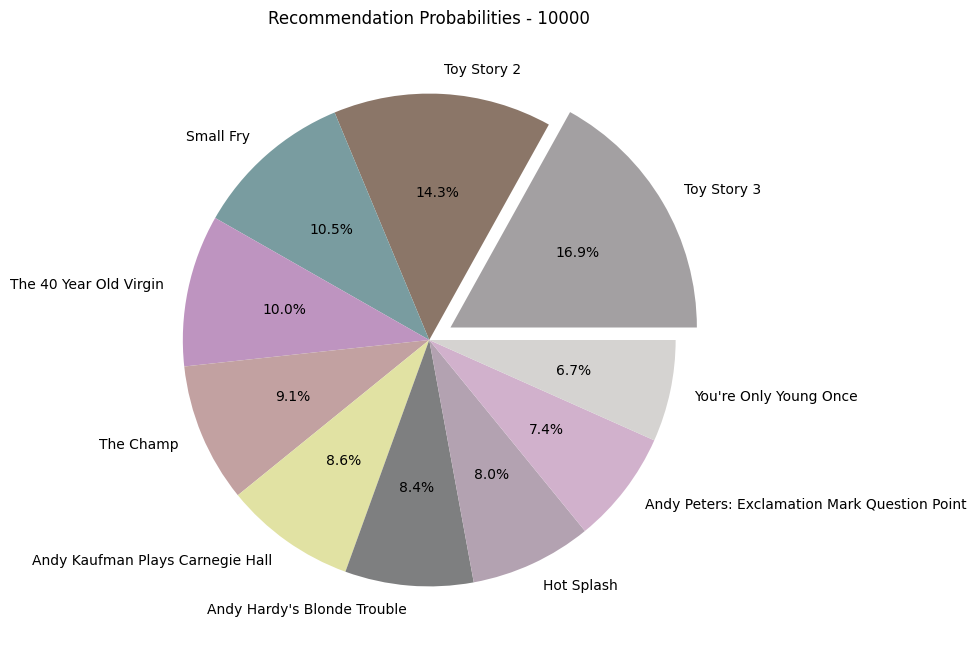

In [62]:
# 10000 features
# Feature extraction and similarity calculation
max_features = 10000  # Limiting to 10000 features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=max_features)
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_metadata['combined_features'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Recommendation function
def recommend_movies_with_scores(movie_id, cosine_sim, movies_metadata, top_n=10):
    if movie_id not in movies_metadata['id'].values:
        return "Movie ID not found."
    idx = movies_metadata.index[movies_metadata['id'] == movie_id].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]
    movie_scores = [i[1] for i in sim_scores]
    return movies_metadata['title'].iloc[movie_indices].tolist(), movie_scores

# Running the recommendation system with scores
movie_id = 862  # Toy Story
recommended_movies, scores = recommend_movies_with_scores(movie_id, cosine_sim, movies_metadata)

# Creating a pie chart for the recommendation probabilities
colors = ['#a3a0a2', '#8b7668', '#799ca0', '#be94c0', '#c2a1a1', '#e1e2a3', '#7e7f80', '#b3a2b1', '#d1b1cc', '#d5d3d1']
max_score = scores.index(max(scores))
explode = [0.1 if i == max_score else 0 for i in range(len(scores))]
plt.figure(figsize=(8, 8))
plt.pie(scores, labels=recommended_movies, autopct='%1.1f%%', colors = colors, explode = explode)
plt.title('Recommendation Probabilities - 10000')
plt.show()

In [63]:
input_movie_genre = movies_metadata[movies_metadata['id']==movie_id]['genres']
input_movie_genre

0    Animation Comedy Family
Name: genres, dtype: object

In [64]:
for x in recommended_movies:
    genres = movies_metadata[movies_metadata['title'] == x]['genres'].values
    print(list(genres))

['Animation Family Comedy']
['Animation Comedy Family']
['Animation Family']
['Comedy Romance']
['Drama Family', 'Drama']
['']
['Comedy Family Romance']
['']
['Comedy']
['Comedy Romance']
